# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Оглавление проекта:
* 1. [Изучение общей информации данных](#step1)
    * 1.1. [Вывод](#step2)
* 2. [Предобработка данных](#step3)
    * 2.1. [Работа с пропущенными значениями и изменение типов данных](#step4)
    * 2.2. [Вывод](#step5)
* 3. [Добавление новых столбцов](#step6) 
    * 3.1. [Вывод](#step7)
* 4. [Исследовательский анализ данных](#step8)  
    * 4.1. [Подсчет среднего и медианы времени продажи квартиры](#step9)
    * 4.2. [Анализ зависимости параметров](#step10)
    * 4.3. [Топ 10 с наибольшим числом объявлений](#step11)
    * 4.4. [Анализ квартир в Санкт-Петербурге](#step12)
    * 4.5. [Анализ квартир в центре](#step13)
* 5. [Общий вывод](#step14) 

### Шаг 1. Откройте файл с данными и изучите общую информацию.  <a name="step1"></a>

In [1]:
import pandas as pd 

Прочитаем файл real_estate_data.csv и сохраним его в переменной data.

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around3000	ponds_nearest	days_exposition    23699 non-null object
dtypes: object(1)
memory usage: 185.3+ KB


Данные в таблице склеились в одну строку, это может означать что данные записаны не корректно. Нужно структурировать данные для удобного восприятия.

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Рассмотрим полученную информацию более подробно. 
Всего в таблице 22 столбца, тип данных у которых bool(2), float64(14), int64(3), object(3)

In [4]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод <a name="step2"></a>

В таблице обнаружили, что в данных очень много пропусков, возможно это связано с не правильной выгрузкой данных, или пользователь оставил поля пустыми. 

### Шаг 2. Предобработка данных <a name="step3"></a>

Проверим данные на наличие пропусков вызовом набора методов для суммирования пропущенных значений. <a name="step4"></a>

In [5]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пустые значения свидетельствуют о наличии пропусков. В столбце balcony можно предположить что пользователь не указал колличество балконов, потому что их нет, поэтому такие пропуски мы заменим на 0.

In [6]:
data['balcony'] = data['balcony'].fillna(0)
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
#Изменим вещественный тип данных на целочисленный у столбца balcony
data['balcony'] = data['balcony'].astype(int).abs()

ceiling_height можно заменить на среднее значение, так как высота потолков на данный момент времени примерно одинаковая. И округлим до 1 знака после запятой.

In [8]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'] = data['ceiling_height'].round(1)

В столбце first_day_exposition округлим дату и время до большего значения, для удобного анализа.

In [9]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M')
data['first_day_exposition'] = data['first_day_exposition'].dt.ceil('1H')

В столбце living_area также обнаружили пропущенные значения, может быть это связано либо с некорректным заполнением данных клиентом, либо не правильно выгрузились данные.В любом случае эти данные нам нужны, поэтому заменим пропущенные значения на среднее отношение жилой площади к общей и изменим вещественный тип на целочисленный.

In [10]:
mean_living_for_total = ((data['living_area'] / data['total_area']).mean())

In [11]:
data['living_area'] = data['living_area'].fillna(value=(mean_living_for_total * data['total_area']))
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.7,16.0,51.000000,8,NaN,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.6,11.0,18.600000,1,NaN,...,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.6,5.0,34.300000,4,NaN,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.6,14.0,89.797718,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.0,14.0,32.000000,13,NaN,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.7,5.0,73.300000,3,NaN,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,2.6,5.0,38.000000,4,NaN,...,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.6,3.0,29.700000,1,NaN,...,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.0,17.0,43.345754,12,NaN,...,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


В столбце kitchen_area обнаружили пропущенные значения, для того чтобы составить соотношение площади кухни к общей площади нужно избавится от пропусков.

In [12]:
mean_kitchen_for_total = ((data['kitchen_area'] / data['total_area']).mean())

In [13]:
data['kitchen_area'] = data['kitchen_area'].fillna(value= (mean_kitchen_for_total * data['total_area']))

В столбце days_exposition есть пропущенные значения, это может быть связано с тем, что объявление еще не снято. Поэтому заменим пропущенные значения на 0.

In [14]:
data['days_exposition'] = data['days_exposition'].fillna(0)

В столбце is_apartment пропуски можно также заменить на 0, в связи с тем что пользователь мог оставить это поле пустым из-за отстуствия понимая что такое аппартаменты(Старшее поколение).

In [15]:
data['is_apartment'] = data['is_apartment'].fillna(0)

В столбце last_price изменим тип данных с вещественного на целочисленный для удобного анализа

In [16]:
data['last_price'] = data['last_price'].astype(int).abs()

In [17]:
data.dropna(subset = ['locality_name'], inplace = True)
data['locality_name'].isnull().sum()

0

### Вывод <a name="step5"></a>

Заполнили пустые пропуски и изменили тип данных с вещественного на целочисленный.

1)В столбце balcony можно предположить что пользователь не указал колличество балконов, потому что их нет, поэтому такие пропуски мы заменим на 0 и изменили тип данных на целочисленный.

2)ceiling_height можно заменить на среднее значение, так как высота потолков на данный момент времени примерно одинаковая

3)В столбце kitchen_area пустые значения заменили на среднее значение.

4)В столбце is_apartment пропуски можно также заменить на 0, в связи с тем что пользователь мог оставить это поле пустым из-за отстуствия понимая что такое аппартаменты(Старшее поколение)
И заменили в некоторых столбцах пропуски на 0, где это возможно.

###  Посчитаем и добавим в таблицу <a name="step6"></a>

Посчитаем и добавим в таблицу цену квадратного метра

In [18]:
data['price_for_area'] = data['last_price'] / data['total_area']
#Округлим до 2 знаков после запятой.
data['price_for_area'] = data['price_for_area'].round(2)

Добавим в таблицу этаж квартиры; 
варианты — первый, последний, другой;

In [19]:
#Создадим функцию, которая будет возвращать этаж квартиры, сгрупированный по вариантам — первый, последний, другой
def floor_group(row):
    if row['floor'] == 1:
        return 'Первый'
    elif row['floor'] == row['floors_total']:
        return 'Последний'
    else:
        return 'другой'
data['floor_group'] = data.apply(floor_group, axis=1) 

Добавим соотношение жилой и общей площади

In [20]:
data['living_for_total_area'] = data['living_area'] / data['total_area']
#Округлим до двух знаков после запятой
data['living_for_total_area'] = data['living_for_total_area'].round(2)

Добавим отношение площади кухни к общей

In [21]:
data['kitchen_for_total_area'] = data['kitchen_area'] / data['total_area']
#Округлим до двух знаков после запятой
data['kitchen_for_total_area'] = data['kitchen_for_total_area'].round(2)

Добавим день недели, месяц и год публикации объявления;

In [22]:
data['day'] = data['first_day_exposition'].dt.day
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [23]:
import calendar
data['month'] = data['month'].apply(lambda x: calendar.month_abbr[x])
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_area,floor_group,living_for_total_area,kitchen_for_total_area,day,month,year
0,20,13000000,108.00,2019-03-07,3,2.7,16.0,51.000000,8,0,...,2.0,755.0,0.0,120370.37,другой,0.47,0.23,7,Mar,2019
1,7,3350000,40.40,2018-12-04,1,2.6,11.0,18.600000,1,0,...,0.0,NaN,81.0,82920.79,Первый,0.46,0.27,4,Dec,2018
2,10,5196000,56.00,2015-08-20,2,2.6,5.0,34.300000,4,0,...,2.0,574.0,558.0,92785.71,другой,0.61,0.15,20,Aug,2015
3,0,64900000,159.00,2015-07-24,3,2.6,14.0,89.797718,9,0,...,3.0,234.0,424.0,408176.10,другой,0.56,0.19,24,Jul,2015
4,2,10000000,100.00,2018-06-19,2,3.0,14.0,32.000000,13,0,...,1.0,48.0,121.0,100000.00,другой,0.32,0.41,19,Jun,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.7,5.0,73.300000,3,0,...,3.0,381.0,0.0,72490.85,другой,0.55,0.10,21,Mar,2017
23695,14,3100000,59.00,2018-01-15,3,2.6,5.0,38.000000,4,0,...,NaN,NaN,45.0,52542.37,другой,0.64,0.14,15,Jan,2018
23696,18,2500000,56.70,2018-02-11,2,2.6,3.0,29.700000,1,0,...,NaN,NaN,0.0,44091.71,Первый,0.52,0.19,11,Feb,2018
23697,13,11475000,76.75,2017-03-28,2,3.0,17.0,43.345754,12,0,...,3.0,196.0,602.0,149511.40,другой,0.56,0.30,28,Mar,2017


Заменим пропущенные значения в столбце cityCenters_nearest.

In [24]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('median'))

### Вывод <a name="step7"></a>

1)Посчитали и добавили в таблицу такие столбцы как:
- Цену квадратного метра(price_for_area)

- Этаж квартиры (первый, последний, другой) столбец floor_group

- Соотношение жилой и общей площади (living_for_total_area) и соотношение жилой и общей площади(kitchen_for_total_area)

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции: <a name="step8"></a>

Построим гистограммы для площади квартиры, цены, числа комнат и высоты потолков. Для этого используем метод hist() 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f1a1285d0>]],
      dtype=object)

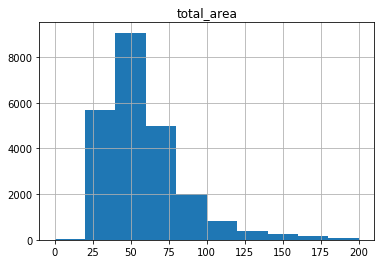

In [25]:
data.hist(column = 'total_area', range = (0, 200))

Из данной гистограммы можно увидеть, что самый мощный пик площади квартир находится в 50, а самый низкий в районе от 160 до 200.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f196c9dd0>]],
      dtype=object)

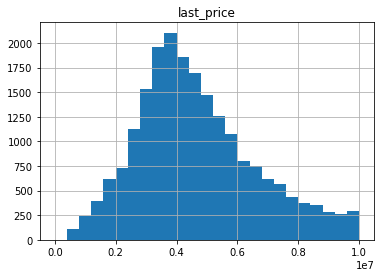

In [26]:
data.hist(column = 'last_price', bins = 25, range=(0, 10000000))

На данной гистограмме самый мощный пик в районе 4 млн рублей , можно преположить что большинство продает именно за эту цену.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f19347b10>]],
      dtype=object)

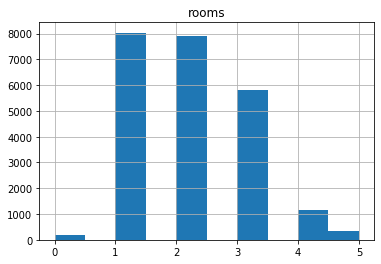

In [27]:
data.hist(column = 'rooms', range = (0, 5))

На данной гистограме видим что очень много квартир, где по одной, две или три комнаты. И очень мало квартир где комнат от 4 до 5.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f195b2950>]],
      dtype=object)

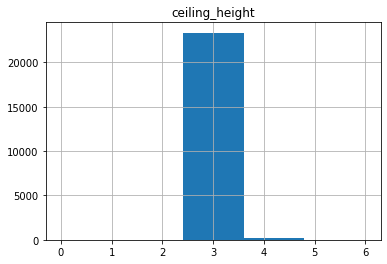

In [28]:
data.hist(column = 'ceiling_height',bins = 5, range = (0, 6))

Да данной гистограмме видим, что высота потолков варьируется в пределах от 2,5 до 3,5. Но так же есть данные, где высота потолков превышает 3,5 метра. Возможно это коммерческие здания, либо старый фонд

Изучим время продажи квартиры и построим гистограмму. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f19524190>]],
      dtype=object)

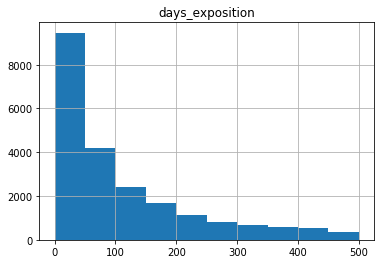

In [29]:
data.hist(column = 'days_exposition',range = (0, 500))

На данной гистограмме можно увидеть, что основной пик времени продажи квартиры в районе от 0 до 50 дней, что вполне нормально. Посмотрим на значения, которые в районе от 300 до 500, а их не мало. Можно предположить, что это либо мошенники, либо пользователь не снял объявление после прожади квартиры.

Посчитаем среднее значение и медиану. <a name="step9"></a>

In [30]:
data['days_exposition'].describe()

count    23650.000000
mean       156.448964
std        213.564548
min          0.000000
25%         22.000000
50%         73.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее значение равно 156, тоесть можно предположить что в среднем квартиру продают 156 дней. А медиана равна 74 дням. Из этого можно сделать вывод, что в 25% процентов случаев квартиру продают очень быстро, а в 75% случаях очень долго. 

Уберем редкие и выбивающиеся значения и опишем, какие особенности обнаружили. Изучим зависит ли цена от площади, числа комнат, удалённости от центра. <a name="step10"></a>

Построим boxplot для определения выбросов 

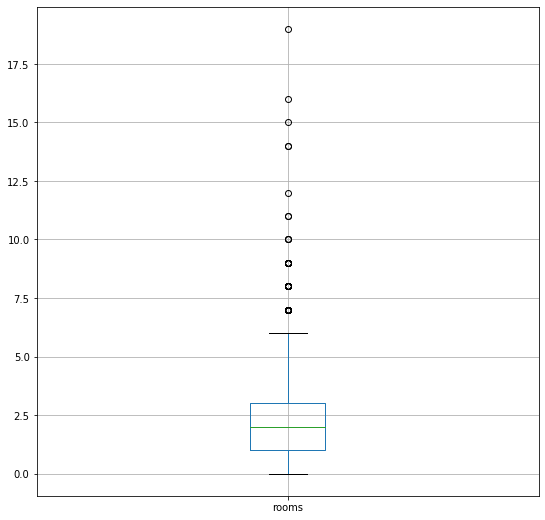

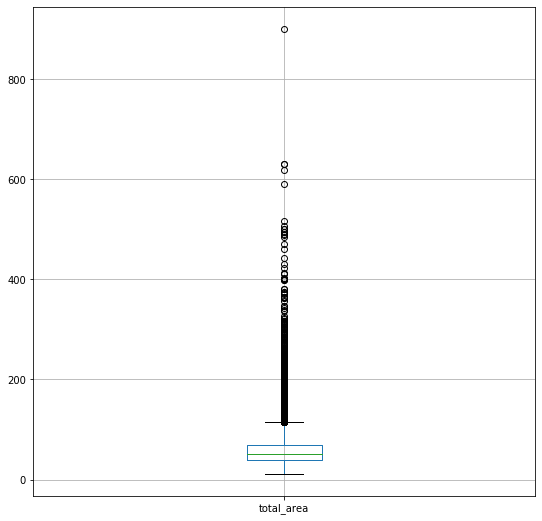

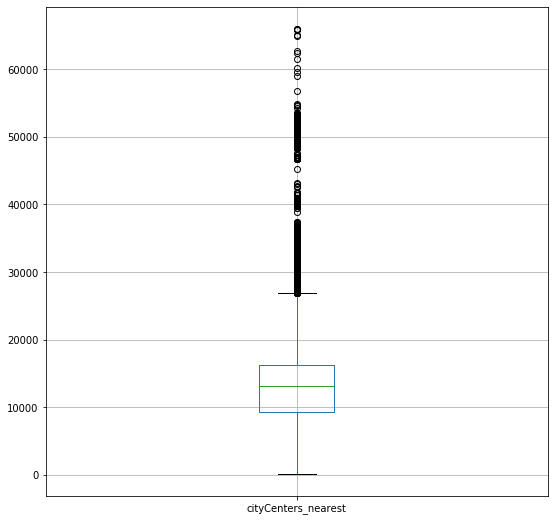

In [31]:
import matplotlib.pyplot as plt
columns = ['rooms','total_area', 'cityCenters_nearest']

for column in columns:
    data.boxplot(column,figsize=(9,9))
    plt.show()

Большая часть значений варьируется от 0 до 280000, поэтому отбросим данные которые не входят в это число 

In [32]:
data = data.query('rooms < 6 and total_area < 100 and ( 0 <cityCenters_nearest< 28000)')

Построим матрицу корреляции для того чтобы изучить зависит ли цена от площади, числа комнат, удалённости от центра

In [33]:
data.corr()['last_price']

total_images              0.151086
last_price                1.000000
total_area                0.697833
rooms                     0.391294
ceiling_height            0.087122
floors_total             -0.001944
living_area               0.560647
floor                     0.012214
studio                   -0.060989
open_plan                -0.036472
kitchen_area              0.526673
balcony                   0.055861
airports_nearest         -0.019252
cityCenters_nearest      -0.378939
parks_around3000          0.178003
parks_nearest             0.040462
ponds_around3000          0.226931
ponds_nearest            -0.100377
days_exposition           0.056295
price_for_area            0.706620
living_for_total_area     0.016710
kitchen_for_total_area   -0.070926
day                       0.004031
year                      0.022938
Name: last_price, dtype: float64

Исходя из графика можно сделать вывод о том, что цена квартиры зависит напрямую от коллличества комнат и общей площади квартиры. А вот от удаленности от центра наоборот, чем дальше дальше от центра тем выше стоимость квартиры.

Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 

In [34]:
data.pivot_table(index='floor_group',values='last_price',aggfunc='mean')

,last_price
floor_group,
Первый,5.174237e+06
Последний,5.907361e+06
другой,6.005256e+06


In [35]:
data.pivot_table(index= 'day',values='last_price',aggfunc='mean')

,last_price
day,
1,5.991309e+06
2,5.676254e+06
3,5.913192e+06
4,6.148536e+06
5,5.963230e+06
6,5.780016e+06
7,5.616201e+06
8,5.891376e+06
9,5.944973e+06


Проанализировав сводную таблицу, увидели что цена возрастает примерно с периодичностью в 5 дней.Это может быть связано с тем, что это выходные и по выходным возрастает спрос на квартиры.

In [36]:
data.pivot_table(index= 'month',values='last_price',aggfunc='mean')

,last_price
month,
Apr,6.068372e+06
Aug,5.795907e+06
Dec,6.008972e+06
Feb,5.887369e+06
Jan,5.967268e+06
Jul,5.761093e+06
Jun,5.810138e+06
Mar,6.053985e+06
May,5.694291e+06


Изучив данные сводной таблицу, можно сделать вывод что цена возрастает по сезонам. А именно конец года, начало весны, конец весны и последний месяц осени.

In [37]:
 data.pivot_table(index= 'year',values='last_price',aggfunc='mean') 

,last_price
year,
2014,9.069772e+06
2015,6.272102e+06
2016,5.706215e+06
2017,5.708265e+06
2018,5.892416e+06
2019,6.416341e+06


Проанализировав сводную таблицу, можно заметить что самый высокий пик по стоимости квартиры был в 2014 году. Могу преположить, что это связано с кризисом в этом 2014 году.

Выберем 10 населеных пунктов с наибольшим числом объявлений. <a name="step11"></a>

In [38]:
data_top = data['locality_name'].value_counts().head(10)
data_top_10 = data.query('locality_name in @data_top.index')

Посчитайте среднюю цену квадратного метра в этих населённых пунктах.

In [39]:
mean_top_10 = data_top_10.groupby('locality_name')['price_for_area'].mean()
mean_top_10

locality_name
Красное Село                75202.585000
Пушкин                     102563.701404
Санкт-Петербург            109930.283872
поселок Мурино              84600.507353
посёлок Александровская     63559.320000
посёлок Металлострой        74323.917547
посёлок Парголово           90494.579691
посёлок Песочный            79726.842500
посёлок Стрельна            88363.082195
посёлок Шушары              81050.218498
Name: price_for_area, dtype: float64

Средняя цена за квадратный метр в этих районах варьируется от 70000 до 1000000 тысяч рублей

Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [40]:
top_max_price = data_top_10.groupby('locality_name')['last_price'].max()
top_max_price

locality_name
Красное Село                4000000
Пушкин                     15000000
Санкт-Петербург            53000000
поселок Мурино              7000000
посёлок Александровская     3750000
посёлок Металлострой        5500000
посёлок Парголово           9140000
посёлок Песочный            3200000
посёлок Стрельна            8650000
посёлок Шушары              8179000
Name: last_price, dtype: int64

Самая высокая цена среди этих населенных пунктах в Санкт-Петербурге, составляет 763000000. Аномально высокое значение

In [41]:
top_min_price = data_top_10.groupby('locality_name')['last_price'].min()
top_min_price

locality_name
Красное Село               3000000
Пушкин                     2550000
Санкт-Петербург            1190000
поселок Мурино             1811250
посёлок Александровская    3750000
посёлок Металлострой       2290000
посёлок Парголово          1400000
посёлок Песочный           2900000
посёлок Стрельна           2550000
посёлок Шушары             1780000
Name: last_price, dtype: int64

Самая низкая цена среди этих населенных пунктов в Санкт-Петербурге, составляет 12190. Аномально низкое значение

Выделим квартиры в Санкт-Петербурге ('locality_name')  <a name="step12"></a>

In [47]:
dat = data.query('locality_name in("Санкт-Петербург")')

In [50]:
dat['nearest_Center'] = dat['cityCenters_nearest'] / 1000
dat['nearest_Center'] = dat['nearest_Center'].round(0) #Округлим до целого значения

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Посчитайте среднюю цену для каждого километра и построим график, который показывает, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

Text(0, 0.5, 'Расстояние до центра')

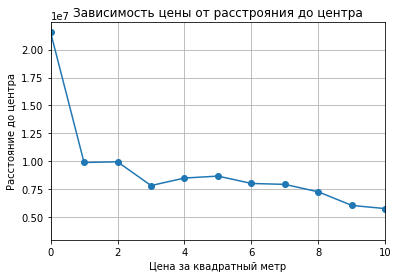

In [52]:
mean_price_for_nearest = dat.groupby('nearest_Center')['last_price'].mean().round(0)
mean_price_for_nearest.astype(int).abs() #Изменим тип данных с вещественного на целочисленный
ax = mean_price_for_nearest.plot(x='price_for_area', y='nearest_Center', style='o-',xlim=(0, 10), grid=True, title='Зависимость цены от расстрояния до центра')
ax.set_xlabel('Цена за квадратный метр')
ax.set_ylabel('Расстояние до центра')

Исходя из графика можно определить, что где график сильно изменяется является центральной зоной. Этой зоне соответсвует диапазон от 0 до 1.5 по оси Х

Выделим сегмент квартир в центре. <a name="step13"></a>

In [53]:
df = dat.query('nearest_Center <= 3')

Посчитаем число корреляции, для того чтобы посмотреть как стоимость квартиры зависит от числа комнат, этажа, удалённости от центра и даты размещения объявления.

In [54]:
df.corr()['last_price']

total_images              0.159225
last_price                1.000000
total_area                0.397512
rooms                     0.128030
ceiling_height            0.049586
floors_total              0.124356
living_area               0.336392
floor                     0.148766
studio                   -0.055914
open_plan                -0.056213
kitchen_area              0.303485
balcony                   0.315856
airports_nearest          0.107990
cityCenters_nearest      -0.232448
parks_around3000          0.088824
parks_nearest            -0.084425
ponds_around3000          0.094588
ponds_nearest            -0.023208
days_exposition           0.036538
price_for_area            0.817215
living_for_total_area     0.041658
kitchen_for_total_area    0.048120
day                       0.051893
year                      0.017410
nearest_Center           -0.273050
Name: last_price, dtype: float64

Исходя из матрицы корреляции можно сделать вывод о том, что цена квартиры зависит напрямую от коллличества комнат и общей площади квартиры. А вот от удаленности от центра наоборот, чем дальше дальше от центра тем выше стоимость квартиры.
На перовм графике видно, что большенство квартир по площади находятся в диапазоне от 0 до 200 кв метров. 
А вот удаленность от центра сосредоточена на диапазоне от 0 до 3 км

Сравним матрицу корреляции для всех данных и для данных квартир в центре.  
1) Зависимость цены от площади квартиры в центре меньше, чем для всего Питербурга и округи, но цена за квадратный метр в центре выше. 

2) Зависимость цены от колличества комнат в центре меньше, чем в округе. Могу преположить, что в основном все связано с меторасположением квартиры в центре(ближе к метро или дальше и тд.)

Можно сделать вывод, что люди которые ищут квартиру не в центре ценят больше общую площадь квартиры, от этого и зависит в основном цена квартиры, а те кто ищут в центре - жилую площадь , колличество этажей и цену за квадратный метр

### Общий вывод <a name="step14"></a>

1) Изучили общую информацию о данных, разделили склеившиеся данные и обнаружили пропуски. Они могли быть связаны с неккоректной выгрузкой данных или пользователь оставил это поле пыстым по тем или иным причинам.

2) Заполнили пропуски где возможно 0, а где средним значением. Исходили из логики что картографические данные загружались автоматически, а остальные пустые поля, где пользователь оставил пропуск заполняли нулями(Например столбец балконы, мы предположили что если пользователь не заполнил это поле, значит балкона просто нет.

3) Посчитали и добавили в таблицу такие столбцы как:Цену квадратного метра, Этаж квартиры, Соотношение жилой и общей площади и соотношение жилой и общей площади(kitchen_for_total_area)

4) Построили гистограммы для площади квартиры, цены, числа комнат и высоты потолков.

5) Избавились от редких и выбивающихся значениях, сперва проанализировав все данные. И посмотрели как зависит цена от таких параметров как общая площадь квартиры, удаленность от центра и колличества комнат 

6) Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом и построили график
7) Выберали 10 населеных пунктов с наибольшим числом объявлений и посчитали среднюю цену квадратного метра в этих населённых пунктах, которая составляет от 70000 до 1000000 тысяч рублей.

8) Выделены квартиры в Санкт-Петербурге и посчитали среднюю цену для каждого километра и построили график, который показывает как цена зависит от удалённости от центра.

9) Выделим сегмент квартир в центре и посчитали число корреляции, для того чтобы посмотреть как стоимость квартиры зависит от числа комнат, этажа, удалённости от центра и даты размещения объявления.